<a href="https://colab.research.google.com/github/GAKIZAB/Projet-Machine-learning-avec-Python/blob/main/Pr%C3%A9diction%20et%20selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet : Prédiction de la popularité des articles**
# **Introduction**
Dans ce projet, nous nous intéressons à la prédiction de la popularité d’articles en nous basant sur leurs métadonnées. L’objectif est de développer un modèle de machine learning capable de prédire, avec précision, le niveau de popularité d’un article à partir des informations descriptives qui lui sont associées.

Avec l’explosion des contenus en ligne, cette problématique représente un enjeu clé pour de nombreux secteurs, notamment le marketing numérique, les réseaux sociaux et les plateformes de publication. Une telle prédiction offre plusieurs avantages stratégiques :

Optimiser la diffusion des articles :
  - Identifier ceux ayant un fort potentiel d’engagement pour les mettre en avant.
  - Améliorer la stratégie de contenu : Aider les rédacteurs et éditeurs à se concentrer sur les caractéristiques des articles les plus performants.
  - Maximiser les revenus publicitaires : Privilégier les articles susceptibles de générer un trafic élevé.

# 1. **Chargement et préparation de données réelles**

In [5]:
# importattion des données
import pandas as pd

data = pd.read_csv('OnlineNewsPopularity.csv')
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [6]:
data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [7]:
# Suppression des espaces devant 'shares' et dans le nom de la colonne cible si nécessaire
data.columns = data.columns.str.strip()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [9]:
# Desciption des données
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


In [10]:
data.drop(['url', 'timedelta'], axis=1, inplace=True)

In [ ]:
# Description de la variable cible
data['shares'].describe()

,shares
count,39644.000000
mean,3395.380184
std,11626.950749
min,1.000000
25%,946.000000
50%,1400.000000
75%,2800.000000
max,843300.000000


Text(0.5, 1.0, 'Boxplot de la variable cible')

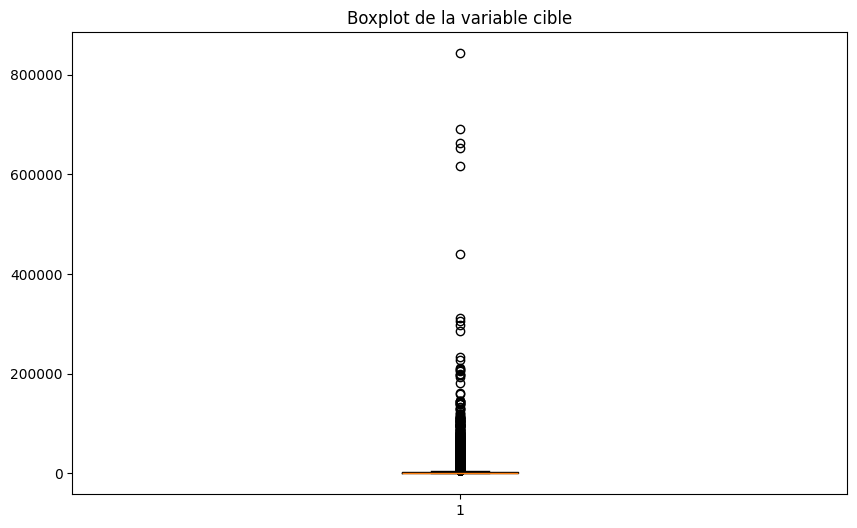

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(data['shares'])
plt.title('Boxplot de la variable cible')

In [12]:
# Lien entre la variable cible et les autres variables
correlations = data.corr()['shares'].sort_values(ascending=False)[1:]
correlations

,shares
kw_avg_avg,0.110413
LDA_03,0.083771
kw_max_avg,0.064306
self_reference_avg_sharess,0.057789
self_reference_min_shares,0.055958
self_reference_max_shares,0.047115
num_hrefs,0.045404
kw_avg_max,0.044686
kw_min_avg,0.039551
num_imgs,0.039388


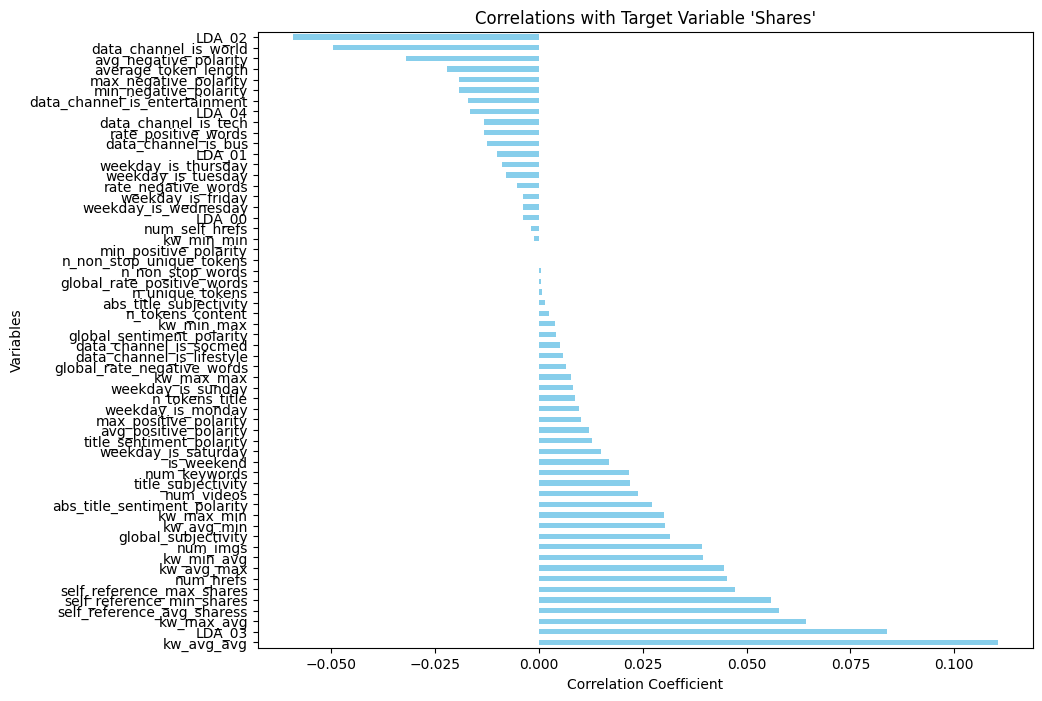

In [13]:
import matplotlib.pyplot as plt

# Créer un graphique en barres horizontales
plt.figure(figsize=(10, 8))
correlations.plot(kind='barh', color='skyblue')
plt.title("Correlations with Target Variable 'Shares'")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Variables")
plt.show()


# 2.   **Prédiction**



In [15]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.0 MB/s eta 0:00:00


In [16]:
# prompt: randomforest classification

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import umap
from sklearn.metrics import accuracy_score

# Convertir la variable cible 'shares' en une variable catégorielle (par exemple, en classes de popularité)
bins = [0,  1400, float('inf')]
labels = ['Pas_Populaire', 'Populaire']
data['popularite'] = pd.cut(data['shares'], bins=bins, labels=labels)

# Diviser les données en ensembles d'entraînement et de test
X = data.drop(['shares', 'popularite'], axis=1)
y = data['popularite']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
# Importation des bibliothèques nécessaires
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Fonction pour entraîner et évaluer un modèle
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # Prédictions sur le jeu de test
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1, y_pred  # Retourne aussi y_pred pour l'affichage

# On définit les modèles à évaluer
models = [KNeighborsClassifier(), RandomForestClassifier(), SVC()]

# On définit les méthodes de réduction de dimension
dimension_reduction_methods = [None, PCA(n_components=0.95), UMAP(n_components=10)]

# Boucle pour évaluer les modèles avec les différentes méthodes de réduction de dimension
for model in models:
    for method in dimension_reduction_methods:
        # Copie des données pour éviter de modifier les données originales
        X_train_reduced = X_train.copy()
        X_test_reduced = X_test.copy()

        if method is not None:
            method.fit(X_train)
            X_train_reduced = method.transform(X_train)
            X_test_reduced = method.transform(X_test)

        accuracy, precision, recall, f1, y_pred = evaluate_model(model, X_train_reduced, y_train, X_test_reduced, y_test)
        print(f"Model: {type(model).__name__}, Dimension Reduction: {type(method).__name__ if method else 'None'}")
        # Affichage des résultats détaillés
        print("\nClassification Report:\n", classification_report(y_test, y_pred))
        print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("-" * 50)


Model: KNeighborsClassifier, Dimension Reduction: None

Classification Report:
                precision    recall  f1-score   support

Pas_Populaire       0.58      0.59      0.58      4075
    Populaire       0.56      0.55      0.55      3854

     accuracy                           0.57      7929
    macro avg       0.57      0.57      0.57      7929
 weighted avg       0.57      0.57      0.57      7929


Confusion Matrix:
 [[2395 1680]
 [1737 2117]]
--------------------------------------------------
Model: KNeighborsClassifier, Dimension Reduction: PCA

Classification Report:
                precision    recall  f1-score   support

Pas_Populaire       0.56      0.56      0.56      4075
    Populaire       0.53      0.52      0.53      3854

     accuracy                           0.54      7929
    macro avg       0.54      0.54      0.54      7929
 weighted avg       0.54      0.54      0.54      7929


Confusion Matrix:
 [[2300 1775]
 [1839 2015]]
------------------------------

# **3. Sélection et influence des variables**

In [18]:
def identify_variable_types(df):
    quantitative_variables = []
    binary_variables = []

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            if df[col].nunique() == 2:  # Check for binary variables
                binary_variables.append(col)
            else:
                quantitative_variables.append(col)
        # Add more checks for other variable types if needed
        # e.g., categorical variables, date variables, etc.

    return {
        "quantitative": quantitative_variables,
        "binary": binary_variables
    }

variable_types = identify_variable_types(X)

print("Quantitative Variables:", variable_types["quantitative"])
print("Binary Variables:", variable_types["binary"])

Quantitative Variables: ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity']
Binary Variables: ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channe

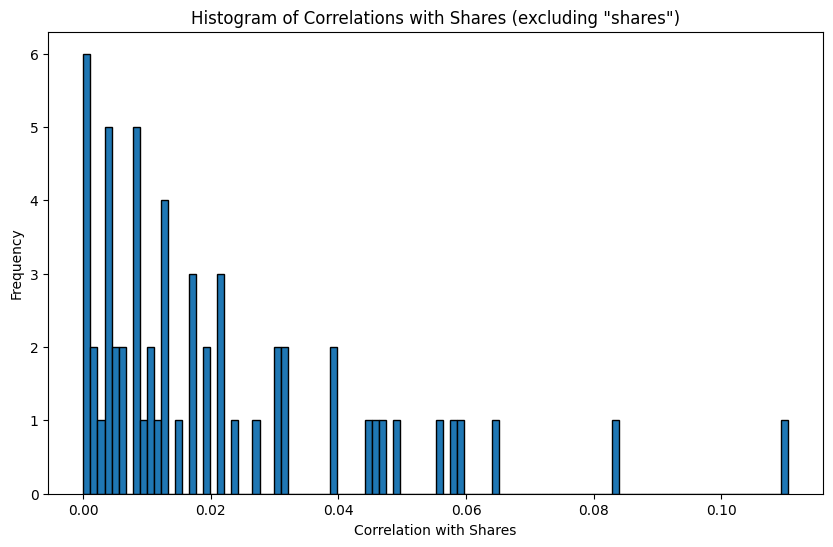

In [19]:

import matplotlib.pyplot as plt

varlist = X.var()
# Selection des variables
variables = data.drop(['popularite', 'shares'], axis=1).columns

# Creation de matrice de correlation
correlation_matrix = data[variables].corr()

# Calculate correlation with 'shares' for each variable
correlations_with_shares = abs(data.drop('popularite', axis=1).corr()['shares'])

# Create the histogram for correlation with 'shares'
plt.figure(figsize=(10, 6))
plt.hist(correlations_with_shares.drop('shares'), bins=100, edgecolor='black')  # Exclude self-correlation
plt.xlabel('Correlation with Shares')
plt.ylabel('Frequency')
plt.title('Histogram of Correlations with Shares (excluding "shares")')
plt.show()

In [20]:
# prompt: donne moi un code je veux garder les variables avec une correlation de 0.04 et une variance superieur a 1

# Filter variables based on correlation and variance
threshold_correlation = 0.04
threshold_variance = 1

selected_variables = []
for col in variables:
    if abs(correlations_with_shares[col]) >= threshold_correlation and varlist[col] >= threshold_variance:
        selected_variables.append(col)

print("Selected variables:", selected_variables)

# Create a new DataFrame with the selected variables
selected_data = data[selected_variables + ['shares', 'popularite']]

print(selected_data.head())

Selected variables: ['num_hrefs', 'kw_avg_max', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess']
   num_hrefs  kw_avg_max  kw_max_avg  kw_avg_avg  self_reference_min_shares  \
0        4.0         0.0         0.0         0.0                      496.0   
1        3.0         0.0         0.0         0.0                        0.0   
2        3.0         0.0         0.0         0.0                      918.0   
3        9.0         0.0         0.0         0.0                        0.0   
4       19.0         0.0         0.0         0.0                      545.0   

   self_reference_max_shares  self_reference_avg_sharess  shares  \
0                      496.0                  496.000000     593   
1                        0.0                    0.000000     711   
2                      918.0                  918.000000    1500   
3                        0.0                    0.000000    1200   
4                    

In [21]:

from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing

# Assuming X_train, X_test, y_train, y_test are already defined as in your previous code
X = selected_data.drop(['popularite','shares'], axis=1)
y = selected_data['popularite']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get the quantitative variables that are actually present in X_train
# This ensures you are selecting existing columns
available_quantitative_vars = [var for var in variable_types["quantitative"] if var in X_train.columns]

# Scale the features using StandardScaler with the available quantitative variables
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train[available_quantitative_vars])
X_test = scaler.transform(X_test[available_quantitative_vars])


# Initialize and train LogisticRegressionCV
logreg_cv = LogisticRegressionCV(cv=5,penalty="l1",solver='liblinear',max_iter=100, random_state=42) # cv: number of cross-validation folds
logreg_cv.fit(X_train, y_train)


# Make predictions on the test set
y_pred_logregcv = logreg_cv.predict(X_test)

# Evaluate the model
accuracy_logregcv = accuracy_score(y_test, y_pred_logregcv)
print(f"LogisticRegressionCV Accuracy: {accuracy_logregcv}")
print(classification_report(y_test, y_pred_logregcv))
print(confusion_matrix(y_test, y_pred_logregcv))

LogisticRegressionCV Accuracy: 0.6153361079581284
               precision    recall  f1-score   support

Pas_Populaire       0.61      0.70      0.65      4075
    Populaire       0.62      0.53      0.57      3854

     accuracy                           0.62      7929
    macro avg       0.62      0.61      0.61      7929
 weighted avg       0.62      0.62      0.61      7929

[[2847 1228]
 [1822 2032]]
